In [1]:
#| label: first
import pandas as pd
import numpy as np 

In [2]:
#| label: read-csv
df = pd.read_csv('companies_and_stock_info.csv')

In [3]:
df

,company_name,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
0,apple,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.956809,691992000,0.000000,0.000000
1,apple,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.966635,1096810400,0.000220,0.000122
2,apple,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.975101,680433600,0.000543,0.000295
3,apple,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.975858,705555200,0.000704,0.000434
4,apple,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.046911,2227450400,0.003604,0.001377
...,...,...,...,...,...,...,...,...,...,...
66037,atnt,2024-04-04,17.620001,17.879999,17.559999,17.570000,17.286842,31850300,0.137127,0.098121
66038,atnt,2024-04-05,17.520000,17.540001,17.280001,17.420000,17.139259,37757200,0.128414,0.104180
66039,atnt,2024-04-08,17.400000,17.459999,17.219999,17.250000,16.972000,27372200,0.106782,0.104700
66040,atnt,2024-04-09,17.000000,17.080000,16.809999,16.900000,16.900000,32802500,0.082873,0.100335


In [4]:
df['Close']

0         1.130179
1         1.141786
2         1.151786
3         1.152679
4         1.236607
           ...    
66037    17.570000
66038    17.420000
66039    17.250000
66040    16.900000
66041    16.730000
Name: Close, Length: 66042, dtype: float64

In [5]:
#| label: df-isnull-sum
df.isnull().sum()

company_name    0
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
MACD            0
Signal Line     0
dtype: int64

In [6]:
#| label: dataset-info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66042 entries, 0 to 66041
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  66042 non-null  object 
 1   Date          66042 non-null  object 
 2   Open          66042 non-null  float64
 3   High          66042 non-null  float64
 4   Low           66042 non-null  float64
 5   Close         66042 non-null  float64
 6   Adj Close     66042 non-null  float64
 7   Volume        66042 non-null  int64  
 8   MACD          66042 non-null  float64
 9   Signal Line   66042 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 5.0+ MB


<h1> Implementing Linear Regression 


In [7]:
#| label: implementing-linear-regression
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [8]:
#| label: linear-regression-model
# Dropping columns not used for training
X = df.drop(['Close', 'company_name', 'Date', 'Adj Close'], axis=1)
y = df['Close']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the SimpleImputer to handle NaN values
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Making predictions
y_pred = model.predict(X_test_imputed)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2683612038409915


<H1> Performing Feature Scaling and then performing Linear Regression again 

In [9]:
#| label: feature-scaling-linear-regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataframe


features = df.drop(['Close', 'company_name', 'Date', 'Adj Close'], axis=1)
target = df['Close']

# Impute missing values using mean
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed)

# Splitting the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.2683612037877385


In [10]:
#| label: mse-rmse-mae-linear-regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)



Mean Squared Error (MSE): 0.2683612037877385
Root Mean Squared Error (RMSE): 0.5180359097473248
Mean Absolute Error (MAE): 0.27706620300720547


In [11]:
#| label: robust-scaler-linear-regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

# Load the dataframe
features = df.drop(['Close', 'company_name', 'Date', 'Adj Close'], axis=1)
target = df['Close']

# Impute missing values using mean
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Feature scaling using RobustScaler
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features_imputed)

# Splitting the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.268361203787748


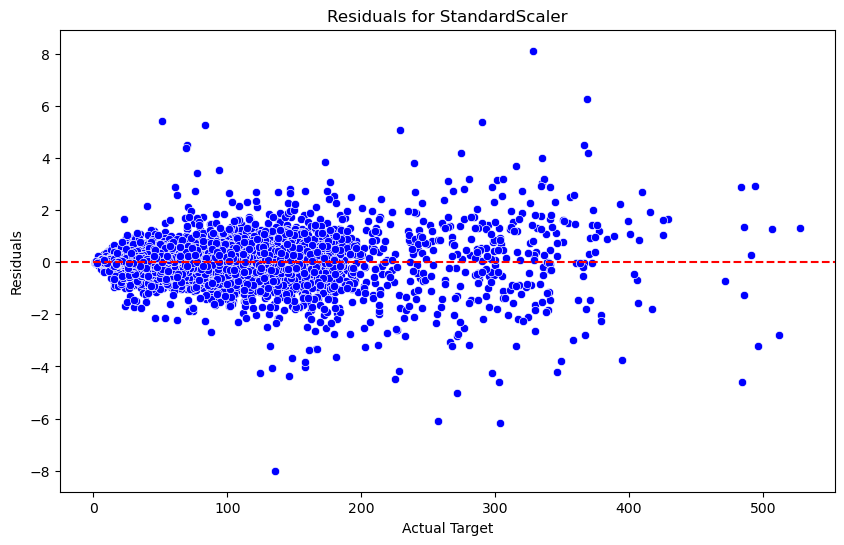

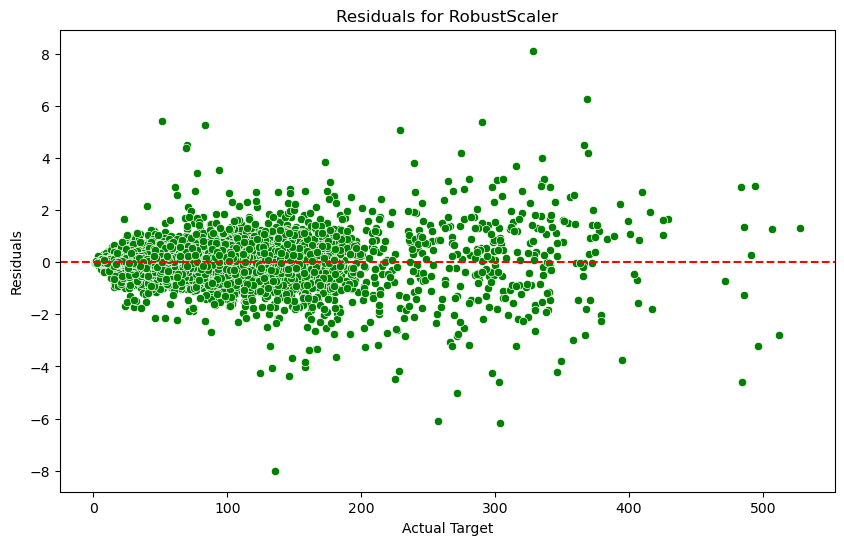

In [12]:
#| label: plot-feature-scaling-based-on-outliers

#Plotting and deciding the Feature Scaling based on the Outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals for both models
residuals_standard = y_test - y_pred
residuals_robust = y_test - y_pred

# Plotting residuals for StandardScaler
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_standard, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for StandardScaler')
plt.xlabel('Actual Target')
plt.ylabel('Residuals')
plt.show()

# Plotting residuals for RobustScaler
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_robust, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for RobustScaler')
plt.xlabel('Actual Target')
plt.ylabel('Residuals')
plt.show()


In [13]:
#Removing outliers 

Mean Squared Error without outliers: 0.08211916358544592


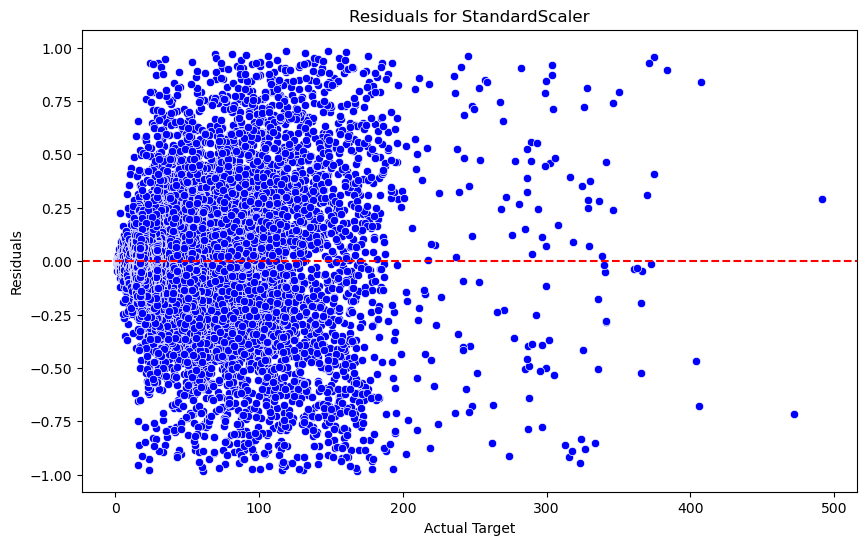

In [14]:
#| label: linear-regression-without-residuals
import numpy as np

# Calculate residuals for StandardScaler model
residuals_standard = y_test - y_pred

# Calculate IQR
Q1 = np.percentile(residuals_standard, 25)
Q3 = np.percentile(residuals_standard, 75)
IQR = Q3 - Q1


threshold = 3 * IQR

# Identify outliers
outliers_mask = (residuals_standard < (Q1 - threshold)) | (residuals_standard > (Q3 + threshold))

# Remove outliers
X_test_no_outliers = X_test[~outliers_mask]
y_test_no_outliers = y_test[~outliers_mask]

# Retrain the model without outliers
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train, y_train)

# Make predictions on the test set without outliers
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)

# Calculate MSE without outliers
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
print("Mean Squared Error without outliers:", mse_no_outliers)


#Plot the residual plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_no_outliers, y=residuals_standard, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals for StandardScaler')
plt.xlabel('Actual Target')
plt.ylabel('Residuals')
plt.show()

<h7>
1.2 0.03518433483161906 <br>

1.5 0.04283597726964874 <br>

2   0.056060575169560554 <br>

3   0.08211916358544777 <br>

In [15]:
#| label: mse-rmse-mae-regression-without-outliers
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_no_outliers, y_pred_no_outliers)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.08211916358544592
Root Mean Squared Error (RMSE): 0.28656441437388197
Mean Absolute Error (MAE): 0.20147611064301904


<h1 >Applying Ensemble Methods

In [16]:
#| label: random-forest-regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data with outliers
rf_model.fit(X_train, y_train)

# Make predictions on the test set without outliers
y_pred_rf = rf_model.predict(X_test_no_outliers)

# Calculate MSE for Random Forest
mse_rf = mean_squared_error(y_test_no_outliers, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)

Mean Squared Error (Random Forest): 0.14432776967280492


<h3>Removing Outliers with Isolation Forest and then performing Random Forest Ensemble method 

In [17]:
#| label: removing-outliers-with-random-forest
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest model
iso_forest = IsolationForest(random_state=42)

# Fit the Isolation Forest model to the training features
iso_forest.fit(X_train)

# Predict outliers in the training features
outlier_mask = iso_forest.predict(X_train) != 1

# Filter the training features to remove outliers
X_train_no_outliers = X_train[outlier_mask]
y_train_no_outliers = y_train[outlier_mask]

# Confirm the shape after removing outliers
print("Shape of X_train without outliers:", X_train_no_outliers.shape)
print("Shape of y_train without outliers:", y_train_no_outliers.shape)


Shape of X_train without outliers: (6290, 6)
Shape of y_train without outliers: (6290,)


In [18]:
#| label: random-forest-model
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data without outliers
rf_model.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the test set without outliers
y_pred_rf = rf_model.predict(X_test_no_outliers)

# Calculate MSE for Random Forest
mse_rf = mean_squared_error(y_test_no_outliers, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)


Mean Squared Error (Random Forest): 3.152440297374175


<h4>Here we see that removing outliers from the training set affects the<br> model's performance severly and thus we tend to keep the outliers as it is!!

<h1>Checking with Gradient Boosting 


In [19]:
#| label: gradient-boosting
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting model
# Initialize Gradient Boosting model with necessary parameters
gb_model = GradientBoostingRegressor(loss='squared_error', 
                                     learning_rate=0.05, 
                                     n_estimators=500, 
                                     subsample=1.0, 
                                     criterion='friedman_mse', 
                                     min_samples_split=5, 
                                     min_samples_leaf=4, 
                                     min_weight_fraction_leaf=0.0, 
                                     max_depth=6, 
                                     min_impurity_decrease=0.0, 
                                     random_state=42, 
                                     alpha=0.1, 
                                     max_features=None, 
                                     verbose=0, 
                                     max_leaf_nodes=None, 
                                     warm_start=False, 
                                     validation_fraction=0.1, 
                                     n_iter_no_change=None, 
                                     tol=0.0001, 
                                     ccp_alpha=0.0)


# Fit the model on the training data without outliers
gb_model.fit(X_train, y_train)

# Make predictions on the test set without outliers
y_pred_gb = gb_model.predict(X_test_no_outliers)

# Calculate MSE for Gradient Boosting

mse_gb = mean_squared_error(y_test_no_outliers, y_pred_gb)
print("Mean Squared Error (Gradient Boosting):", mse_gb)

gb_model.fit(X_train, y_train)
#confirming everything once

Mean Squared Error (Gradient Boosting): 0.18089011755628603


GradientBoostingRegressor(alpha=0.1, learning_rate=0.05, max_depth=6,
                          min_samples_leaf=4, min_samples_split=5,
                          n_estimators=500, random_state=42)

<h4>n =500 <br>
Mean Squared Error (Gradient Boosting): 0.35043449032884033<br>
learning_rate = 0.01<br>
and n_estimators = 100 <br>
MSE is 0.4<br>

learning_rate = 0.01<br>
n_estimators = 500<br>
mse --> 0.3<br>



loss='squared_error', <br>
                                     learning_rate=0.05, <br>
                                     n_estimators=500,<br>
                                     subsample=1.0, <br>
                                     criterion='friedman_mse', <br>
                                     min_samples_split=5, <br>
                                     min_samples_leaf=4, <br>
                                     min_weight_fraction_leaf=0.0, <br>
                                     max_depth=6, <br>
                                     min_impurity_decrease=0.0, <br>
                                     random_state=42, <br>
                                     alpha=0.1, <br>
                                     max_features=None, <br>
                                     verbose=0, <br>
                                     max_leaf_nodes=None, <br>
                                     warm_start=False, <br>
                                     validation_fraction=0.1,<br> 
                                     n_iter_no_change=None, <br>
                                     tol=0.0001, <br>
                                     ccp_alpha=0.0)<br>


                    


<H1>Plotting a Correlation Plot

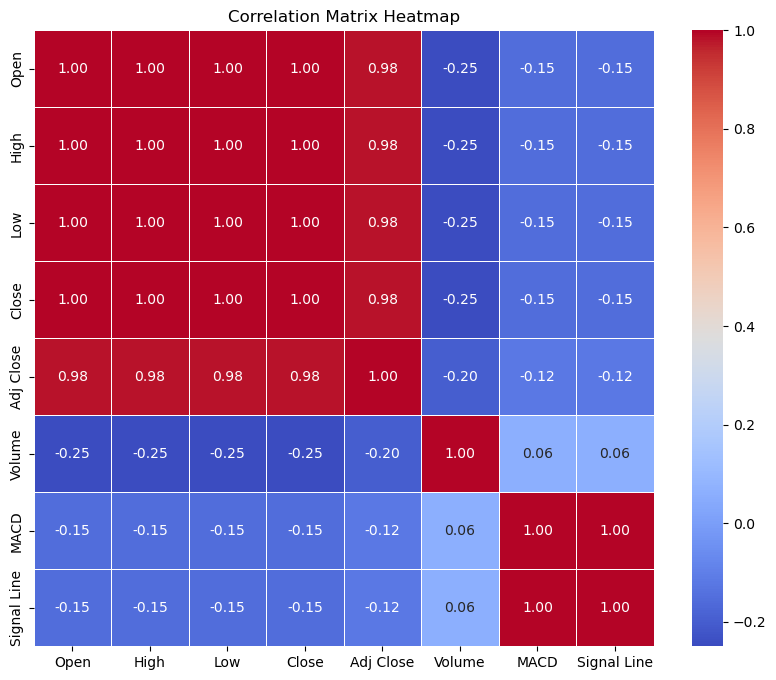

In [20]:
#| label: plotting-correlation-plot
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns from correlation computation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


<h3>Fitting the model

In [21]:
#| label: fitting-gb-model


<h1> Performing residual analysis

In [22]:
#| label: residuals
residuals = y_test_no_outliers - y_pred_gb


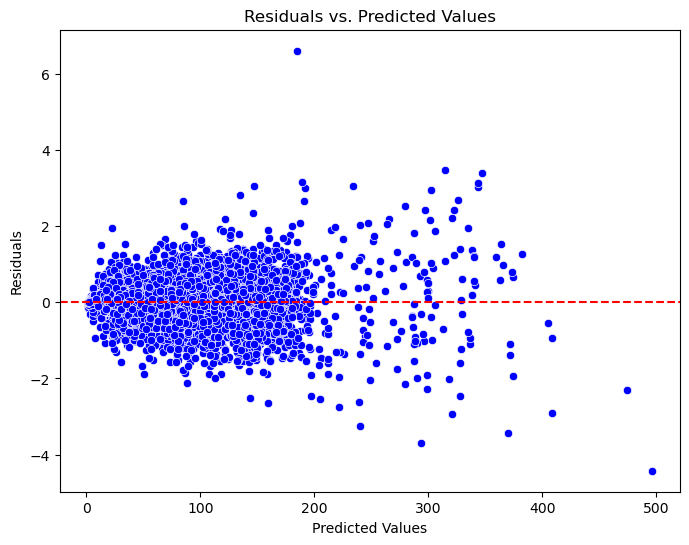

In [23]:
#| label: scatter-plot-of-residuals
# Scatter plot of residuals against predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_gb, y=residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


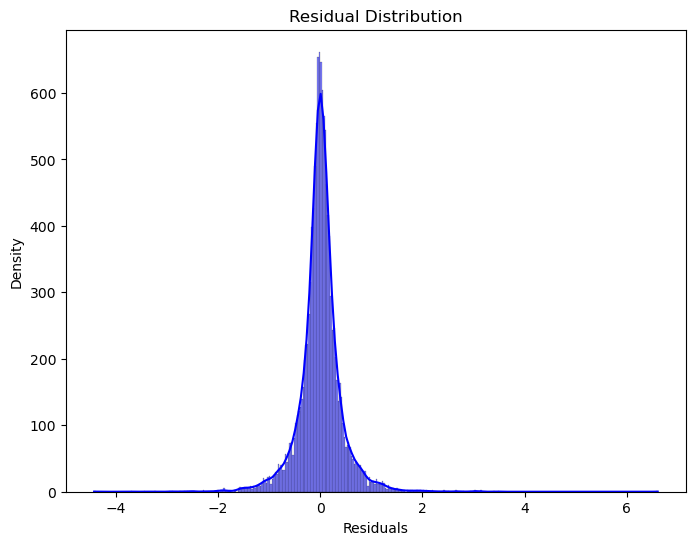

In [24]:
#| label: residual-distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


In [25]:
#| label: fetch-historical-market-data
import yfinance as yf
from datetime import datetime, timedelta

# Define the ticker symbol for Apple
ticker_symbol = 'AAPL'

# Get the date for the day before yesterday
day_before_yesterday_date = datetime.now() - timedelta(days=2)
day_before_yesterday_date_str = day_before_yesterday_date.strftime('%Y-%m-%d')

try:
    # Fetch historical market data for the day before yesterday
    apple_data_day_before_yesterday = yf.download(ticker_symbol, start=day_before_yesterday_date_str, end=day_before_yesterday_date_str)

    # Print the fetched data
    print("Stock Market Information for Apple from the Day Before Yesterday:")
    print(apple_data_day_before_yesterday)
except Exception as e:
    print("Error fetching data:", e)


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AAPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-04-30 -> 2024-04-30)')


Stock Market Information for Apple from the Day Before Yesterday:
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [26]:
#| label: fetching-data-apple
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker_symbol = 'AAPL'

# Retrieve historical data using yfinance
apple_data_predict = yf.download(ticker_symbol, start="2024-04-10", end="2024-04-12")

# Calculate short-term EMA
short_term_period = 12
short_ema = apple_data_predict['Adj Close'].ewm(span=short_term_period, min_periods=1).mean()

# Calculate long-term EMA
long_term_period = 26
long_ema = apple_data_predict['Adj Close'].ewm(span=long_term_period, min_periods=1).mean()

# Calculate MACD line
macd_line = short_ema - long_ema

# Calculate signal line (9-period EMA of MACD line)
signal_period = 9
signal_line = macd_line.ewm(span=signal_period, min_periods=1).mean()

# Add MACD and signal line to the DataFrame
apple_data_predict['MACD'] = macd_line
apple_data_predict['Signal Line'] = signal_line

# Print the first few rows of the data with MACD and signal line
print(apple_data_predict.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-10  168.800003  169.089996  167.110001  167.779999  167.779999   
2024-04-11  168.339996  175.460007  168.160004  175.039993  175.039993   

              Volume      MACD  Signal Line  
Date                                         
2024-04-10  49709300  0.000000     0.000000  
2024-04-11  91070300  0.162884     0.090491  


In [27]:
#| label: create-dataframe-with-specified-index
data_predict1 = {'Open': [168.339996], 
        'High': [175.460007], 
        'Low': [168.160004],   
        'Volume': [91070300], 
        'MACD': [0.162884], 
        'Signal Line': [0.090491]}

# Define the index (e.g., a single index value)
index = [0]

# Create the DataFrame with the specified index
df_predictTest = pd.DataFrame(data_predict1, index=index)

# Print the DataFrame
print(df_predictTest)


         Open        High         Low    Volume      MACD  Signal Line
0  168.339996  175.460007  168.160004  91070300  0.162884     0.090491


In [28]:
#| label: predicting-data
data_predict1 = {'Open': [168.339996], 
                 'High': [175.460007], 
                 'Low': [168.160004],   
                 'Volume': [91070300], 
                 'MACD': [0.162884], 
                 'Signal Line': [0.090491]}

# Create the DataFrame with the specified data
df_predictTest = pd.DataFrame(data_predict1)

# Standardize the new data points using the same scaler object
df_predictTest_scaled = scaler.transform(df_predictTest)

# Pass the standardized new data points to the Gradient Boosting model for prediction
y_pred = gb_model.predict(df_predictTest_scaled)

print("Predicted Values are --> : ", y_pred)

Predicted Values are --> :  [171.83132813]


/Users/manasmaskar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [29]:
#| label: train-df
X_train_df = pd.DataFrame(X_train)
X_train_df

,0,1,2,3,4,5
0,1.337881,1.329229,1.350817,-0.180768,2.859369,3.277721
1,-0.085778,-0.085601,-0.080254,0.170422,0.583942,0.546376
2,-0.423437,-0.426330,-0.420076,0.174698,0.002322,-0.015199
3,-0.270547,-0.273602,-0.266664,-0.335926,-0.671348,-0.742859
4,2.189272,2.204183,2.182438,-0.393722,-106.487220,-113.804161
...,...,...,...,...,...,...
52828,-0.232159,-0.237094,-0.227998,-0.298940,-0.094802,-0.122275
52829,-0.393500,-0.393765,-0.390563,0.889842,-0.324536,-0.172545
52830,2.784553,2.781465,2.749569,-0.114443,5.881886,6.927896
52831,-0.723889,-0.723918,-0.721745,20.696615,0.098583,0.162535
